In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from bias_utils import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# testing set
test_set = pd.read_csv('/mnt/data/HSC/3_model_comparison/testing_2.5_v2.csv')
test_set.drop(columns=['Unnamed: 0'], inplace=True)
X_test = test_set.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_test = test_set.loc[:, 'specz_redshift']

In [3]:
# 1-1-1-1 Stratafied
training_1111 = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_2.5_[1, 1, 1, 1]#1.csv')
training_1111.drop(columns=['Unnamed: 0'], inplace=True)
X_train_1111 = training_1111.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_train_1111 = training_1111.loc[:, 'specz_redshift']

scaler_1111 = StandardScaler()
scaler_1111.fit(X_train_1111) # don't fit X_test !!
X_train_1111 = scaler_1111.transform(X_train_1111)
X_test_1111 = scaler_1111.transform(X_test)

In [4]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_1111, y_train_1111)

RandomForestRegressor(n_estimators=200)

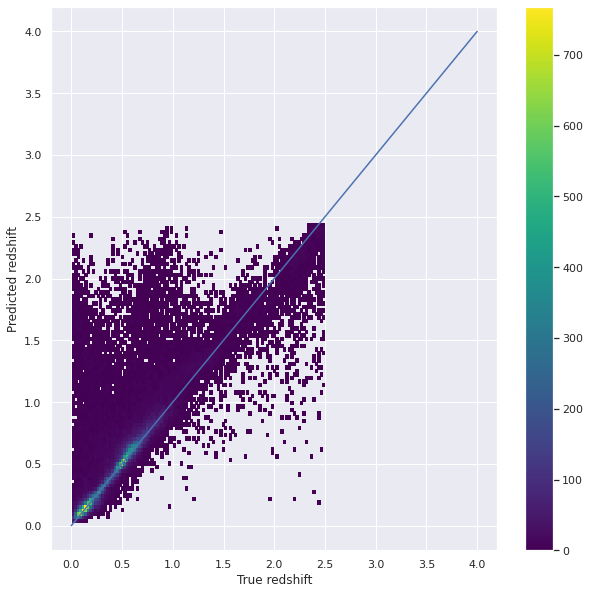

In [5]:
y_test_pred_1111 = rand_forest_model.predict(X_test_1111)
y_test_pred_1111 = pd.Series(y_test_pred_1111)
plot_predictions(y_test_pred_1111, y_test)

In [6]:
# 4-3-2-1 Stratified
training_4321 = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_2.5_[4, 3, 2, 1]#1.csv')
training_4321.drop(columns=['Unnamed: 0'], inplace=True)
X_train_4321 = training_4321.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_train_4321 = training_4321.loc[:, 'specz_redshift']

scaler = StandardScaler()
scaler.fit(X_train_4321) # don't fit X_test !!
X_train_4321 = scaler.transform(X_train_4321)
X_test_4321 = scaler.transform(X_test)

In [7]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_4321, y_train_4321)

RandomForestRegressor(n_estimators=200)

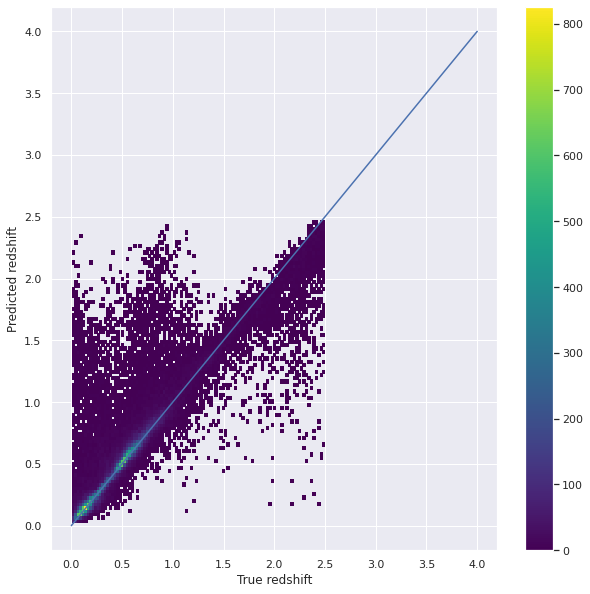

In [8]:
y_test_pred_4321 = rand_forest_model.predict(X_test_4321)
y_test_pred_4321 = pd.Series(y_test_pred_4321)
plot_predictions(y_test_pred_4321, y_test)

In [9]:
# 6-3-2-1 Stratified
training_6321 = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_2.5_[6, 3, 2, 1]#1.csv')
training_6321.drop(columns=['Unnamed: 0'], inplace=True)
X_train_6321 = training_6321.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_train_6321 = training_6321.loc[:, 'specz_redshift']

scaler = StandardScaler()
scaler.fit(X_train_6321) # don't fit X_test !!
X_train_6321 = scaler.transform(X_train_6321)
X_test_6321 = scaler.transform(X_test)

In [10]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_6321, y_train_6321)

RandomForestRegressor(n_estimators=200)

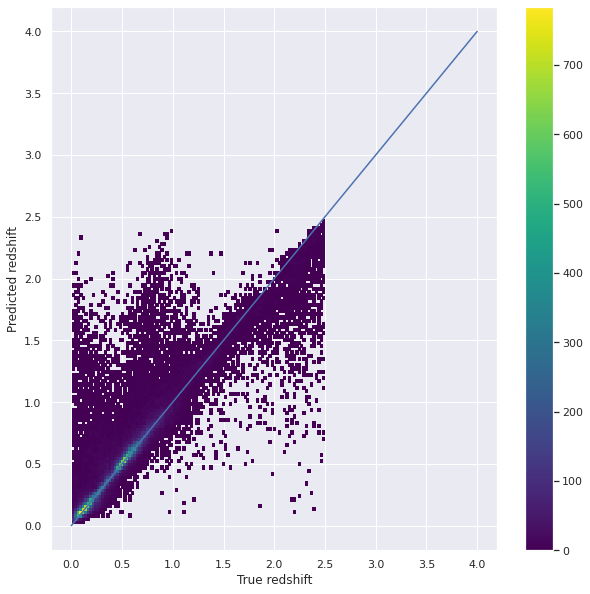

In [11]:
y_test_pred_6321 = rand_forest_model.predict(X_test_6321)
y_test_pred_6321 = pd.Series(y_test_pred_6321)
plot_predictions(y_test_pred_6321, y_test)

In [12]:
# control
training_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_2.5_control#1.csv')
training_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
X_train_ctrl = training_ctrl.loc[:, 'g_cmodel_mag':'y_cmodel_mag']
y_train_ctrl = training_ctrl.loc[:, 'specz_redshift']

scaler = StandardScaler()
scaler.fit(X_train_ctrl) # don't fit X_test !!
X_train_ctrl = scaler.transform(X_train_ctrl)
X_test_ctrl = scaler.transform(X_test)

In [13]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_4321, y_train_4321)

RandomForestRegressor(n_estimators=200)

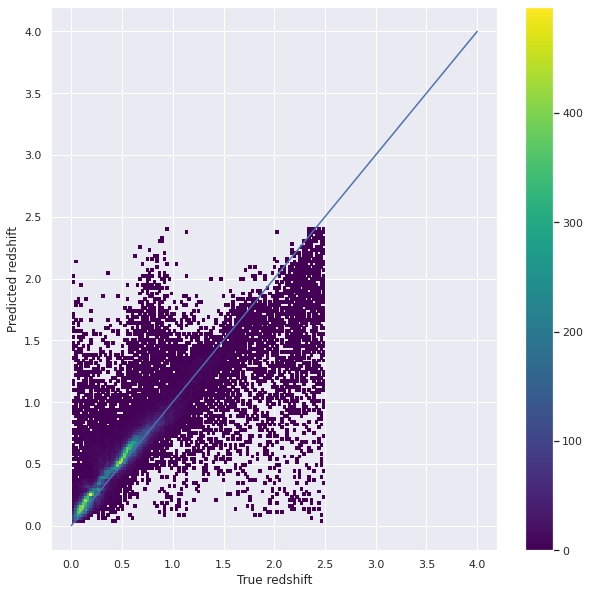

In [14]:
y_test_pred_ctrl = rand_forest_model.predict(X_test_ctrl)
y_test_pred_ctrl = pd.Series(y_test_pred_ctrl)
plot_predictions(y_test_pred_ctrl, y_test)

In [15]:
# y_test_pred_ctrl = pd.DataFrame(y_test_pred_ctrl, columns=['predicted_redshift'])
# y_test_pred_ctrl['specz_redshift'] = y_test
# y_test_pred_1111 = pd.DataFrame(y_test_pred_1111, columns=['predicted_redshift'])
# y_test_pred_1111['specz_redshift'] = y_test
# y_test_pred_4321 = pd.DataFrame(y_test_pred_4321, columns=['predicted_redshift'])
# y_test_pred_4321['specz_redshift'] = y_test
# y_test_pred_6321 = pd.DataFrame(y_test_pred_6321, columns=['predicted_redshift'])
# y_test_pred_6321['specz_redshift'] = y_test

In [34]:
# y_test_pred_ctrl.to_csv('/data/HSC/3_model_comparison/random_forest_predictions_control_2.5_v2.csv')
# y_test_pred_1111.to_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_[1, 1, 1, 1]_v2.csv')
# y_test_pred_4321.to_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_[4, 3, 2, 1]_v2.csv')
# y_test_pred_6321.to_csv('/data/HSC/3_model_comparison/random_forest_predictions_2.5_[6, 3, 2, 1]_v2.csv')